<a href="https://colab.research.google.com/github/inhovation97/Get-an-education-Computer-Vision/blob/main/Object_detection/project2_age_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17009035 정인호

# **실시간 객체탐지 모델인 YOLOv5 모델을 이용하여, 사람 나이 예측하기**
> 원래는 CV 라이브러리를 활용하여 mp4 데이터를 입출력으로 받아 프레임마다 나이를 예측하는 모델을 만드려고 했으나    
> 개인적으로 데이터와 하드웨어의 문제로인해, 아주 간단하게 basic 모델 정도로 설계했습니다...


## <center>**<모델 & 학습 부분 설명>**</center>
### 1. 모델은 실시간 객체 탐지 모델인 **YOLOv5** & **Image classification** 모델 두개가 필요하기 때문에 두 모델을 학습해야합니다.
### 2. (YOLOv5) [roboflow](https://roboflow.com/)라는 사이트에서 실시간 객체 탐지 모델의 학습을 위해 이미지 데이터셋의 bounding box를 만들어 저장해주는 간편한 툴을 제공하니다. 여기서 YOLOv5 모델의 학습을 위한 이미지 데이터의 전처리를 진행합니다. 
![roboflow 활용 이미지](https://miro.medium.com/max/1080/0*wApVYCGhdmAXSjuo)

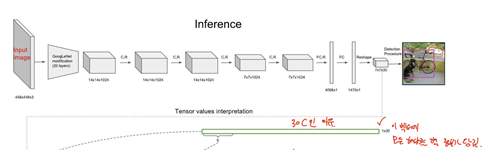

### 3. (YOLOv5) roboflow에서 이미 annotate 해놓은 사람의 사진을 이용해서 학습해도 되지만, 직접 해보는 것을 결정했습니다.
### 이전에 이미 가지고 있었던 유명한 dataset 중 하나인 celebA라는 전세계 유명인들의 이미지 데이터 800장을 train/test/validation -> 7:2:1로 split하여 bounding box를 Male/Female 두 가지 라벨로 직접 제작했습니다.   

### 4. (YOLOv5) 그렇게 전처리한 이미지 800장으로 YOLOv5 모델을 학습합니다. -> 아마 데이터셋도 너무 작고 이미지의 질도 좋지 않아 성능이 우려되어 fine tuning을 진행했습니다. 원래 제가 알기로 YOLOv5는 유명한 coco dataset으로 학습돼있는데, 이 가중치를 그대로 가져와 이진 분류로 fine tuning하여 800장으로 학습 시켜줍니다. 
### (그래도 데이터 셋의 질적인 부분 때문에 성능이 우려됨 -> 직접 bounding box를 만들어 보는 것에 의의를 두었습니다.)    

### 5. (Image Classification) 이 부분은 age dataset의 라벨이 세세하게 분류될 수록 더욱 좋습니다. 0~99세 100개의 클래스가 각각 imbalance하지 않게 골고루 많이 있으면, 더 좋은 분류가 될 것입니다. 분류 됐을 때 가장 확률이 높은 나이 3개 정도를 평균낸 나이로 추론하고 싶었는데, 서칭해 본 결과 20GB가 넘는 데이터셋이었습니다. 직접 학습시키기에는 환경이 너무 어려웠습니다...   
### 그렇기때문에 CV2 라이브러리에서 제공하는 Caffe로 학습된 모델을 불러와 대체해보았습니다.
### caffe image classification 모델의 분류 라벨
###'(4 ~ 6)’
###'(8 ~ 12)’
###'(15 ~ 20)’
###'(25 ~ 32)’
###'(38 ~ 43)’
###'(48 ~ 53)’
###'(60 ~ 100'
### 나이를 너무 광범위하게 뱉어내서 맘에 들지는 않습니다... 심지어 caffe 모델은 이미 너무 옛날에 만들어진 모델이라 거의 쓸 수 없는 수준이었습니다. 최근 안홍렬 교수님과의 컨택으로 학교 서버를 이용할 수 있도록 허가를 받은 상태라 2차 추론 모델은 따로 많은 데이터들로 vggnet과 같은 classification에서 성능이 좋은 모델들을 fine tuning하여 진행할 예정입니다. 현재는 저의 프로젝트는 1차 추론과 bounding box에 따른 2차 추론의 준비까지 완료된 상태입니다... caffe 모델이 너무 좋지 않네요...



## <center>**<추론 부분 설명>**</center>
### 1. Yolo v5가 사람의 영상 데이터를 입력 받으면, Male or Female을 탐지하도록 이진 분류로 1차 추론합니다.   

### 2. 실시간 객체 탐지 모델은 bounding box를 male/female을 탐지하여 영상 내에 male, femal이 담긴 bounding box를 내뱉으면, 그 bounding box의 좌표값이 txt 파일로 저장됩니다.   

### 3. bounding box의 좌표값이 적힌 txt 파일로 하여금 영상 데이터의 남성/여성 부분을 crop하여 미리 학습시켜 두었던 사람의 나이를 분류하는 Image Classification 모델에 넣어 2차 추론이 진행됩니다.   

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 깃허브로 제공된 YOLOv5를 git clone으로 가져옵니다.
!git clone https://github.com/ultralytics/yolov5  # clone repo

%cd yolov5
!git reset --hard 886f1c03d839575afecb059accf74296fad395b6

Cloning into 'yolov5'...
remote: Enumerating objects: 9966, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 9966 (delta 15), reused 18 (delta 9), pack-reused 9928
Receiving objects: 100% (9966/9966), 10.33 MiB | 23.31 MiB/s, done.
Resolving deltas: 100% (6898/6898), done.
/content/yolov5
HEAD is now at 886f1c0 DDP after autoanchor reorder (#2421)


In [ ]:
# YOLOv5를 사용하기위해 필요한 라이브러리들을 설치하기위해 requirements를 install합니다.
!pip install -qr requirements.txt  # install dependencies (ignore errors)
import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

# torch는 GPU에 직접 올려주어야합니다. 제 환경은 코랩입니다.
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.10.0+cu111 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [ ]:
# roboflow는 웹에서 처리한 800장의 male/female 이미지와 bounding box txt파일을 이렇게 코랩과 연동하여 불러올 수 있습니다!

%cd /content
!curl -L "https://app.roboflow.com/ds/YL0O3MGpti?key=f2mMUQ0otl" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

#### trainset과 validationset이 다운로드 됐습니다.    
#### nc는 num_classes로 female/male입니다. roboflow에서 진행한 전처리가 잘 된 것 같습니다.

In [ ]:
# this is the YAML file Roboflow wrote for us that we're loading into this notebook with our data
%cat data.yaml # cat[옵션][파일 이름] -> 파일 경로와 정보가 나옴 -> 이걸 전부 지정해줘서 데이터를 로드해줘야함

train: ../train/images
val: ../valid/images

nc: 2
names: ['female', 'male']

In [ ]:
# define number of classes based on YAML
import yaml # yaml 패키지 임포트
with open("data.yaml", 'r') as stream: # 다운 받은 데이터를 read함
    num_classes = str(yaml.safe_load(stream)['nc']) # read한 데이터에서 nc를 num_classes로 저장

In [ ]:
num_classes

'2'

#### trainset의 이미지 하나를 불러서 확인해봤습니다.    
#### label 부분인 [0 0.6117788461538461 0.5204326923076923 0.5949519230769231 0.6742788461538461]은 차례대로 0 = female을 의미하며 나머지 4개 값은 bounding box의 좌표입니다.

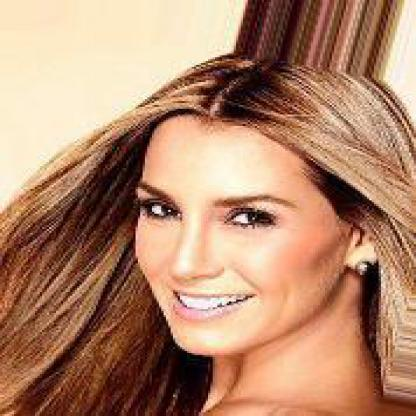

해당 train image의 label 파일:  Empty DataFrame
Columns: [0 0.6117788461538461 0.5204326923076923 0.5949519230769231 0.6742788461538461]
Index: []


In [ ]:
import cv2
from PIL import Image
from google.colab.patches import cv2_imshow
import pandas as pd

label = pd.read_table('/content/train/labels/000001_jpg.rf.c566bfe17eba5710e0c4025fc5e76a62.txt')
img = cv2.imread('/content/train/images/000001_jpg.rf.c566bfe17eba5710e0c4025fc5e76a62.jpg')
cv2_imshow(img)
print('해당 train image의 label 파일: ',label)

#### pretrained YOLOv5는 추론 속도에따라 5개 정도가 있습니다. 저는 일단은 정적 이미지를 추론할 것이기 때문에 비교적 가벼운 모델을 선택합니다.

In [ ]:
#this is the model configuration we will use for our tutorial 
%cat /content/yolov5/models/yolov5s.yaml # yolov5s를 선택

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C

In [ ]:
#customize iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic # 글로벌 변수를 넣기위해

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

#### YOLOv5를 finetuning합니다. -> 아까 위에서 저장한 num_classes를 2로 바꿔줘야함.

In [ ]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# 현재 데이터셋에 맞는 finetuning을 위해 모델 아키텍쳐를 조정하는 부분입니다.

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32`

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

#### 드디어 finetuning으로 학습을 진행합니다.   
#### 100 epochs로 학습합니다. 학습을 끝내면, 경로 내에 가중치를 저장합니다.
#### 가중치는 yolov5/runs 폴더에 best모델이 저장됩니다.

In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 100 --data '../data.yaml' --cfg ./models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

# train.py를 파헤치면 어떻게 인자를 지정하는지 알 수 있음

#### colab 환경이라서 사진을 코랩에 올려 추론을 진행해봅니다.    
#### 교수님 수업이라 학교 홈페이지에 있는 교수님의 이미지로 한 번 나이를 추론해봣습니다!!

In [ ]:
# content, style 사진 업로드
%cd /content/
from google.colab import files
file_uploaded = files.upload()

/content


Saving professor.jpg to professor.jpg


In [ ]:
%cd /content/

/content


In [ ]:
from PIL import Image
tes = '/content/professor.jpg'
tes = Image.open('professor.jpg')

#### finetuning으로 가장 성능이 좋았던 모델의 가중치로 교수님의 얼굴을 detection합니다. 
#### 여기서는 YOLOv5가 교수님의 얼굴을 탐지한 다음에 male or female 이진 분류를 진행합니다. 맨 끝에 --save-txt 명령어를 첨가해 교수님의 얼굴이라고 판단한 bounding box의 txt 파일을 저장합니다.

In [ ]:
%cd /content/yolov5/
!python detect.py --weights /content/drive/MyDrive/yolo_best.pt --source professor.jpg --save-txt 

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=True, source='professor.jpg', update=False, view_img=False, weights=['/content/drive/MyDrive/yolo_best.pt'])
YOLOv5 v4.0-126-g886f1c0 torch 1.9.0+cu111 CPU

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 232 layers, 7249215 parameters, 0 gradients, 16.8 GFLOPS
image 1/1 /content/yolov5/professor.jpg: 640x576 1 male, Done. (0.535s)
Results saved to runs/detect/exp2
1 labels saved to runs/detect/exp

#### 1차 추론은 교수님의 사진을 61%로 male로 detect하였습니다. 이제 이 박스의 얼굴 부분만 crop하여 2차추론으로 넘어갑니다.

In [ ]:
Image.open('/content/yolov5/runs/detect/exp2/professor.jpg')

#### cv2 라이브러리에서 제공하는 Caffe 모델을 이용하는데, pretrained 모델의 가중치는 홈페이지가서 다운받아 왔습니다. 이렇게 2차 추론 모델을 준비해줍니다.

In [ ]:
# https://github.com/DEEPI-LAB/python-opencv-face-detector <<- 참고했던 깃허브
import cv2
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)

%cd /content/drive/MyDrive/Colab Notebooks
# 언령 예측 모델 불러오기

age_net = cv2.dnn.readNetFromCaffe(
  '/content/drive/MyDrive/Colab Notebooks/project2_deploy_age.prototxt',
	'/content/drive/MyDrive/Colab Notebooks/project2_age_net.caffemodel')

# 연령 클래스
age_list = ['(0 ~ 2)','(4 ~ 6)','(8 ~ 12)','(15 ~ 20)',
            '(25 ~ 32)','(38 ~ 43)','(48 ~ 53)','(60 ~ 100)']

            # caffe 모델로 실패한 부분입니다.

/content/drive/MyDrive/Colab Notebooks


In [ ]:
age_net

<dnn_Net 0x7fecc33a76d0>

In [ ]:
%cd /content/yolov5/runs/detect/exp2/labels/

/content/yolov5/runs/detect/exp2/labels


In [ ]:
import glob
from IPython.display import Image, display
from matplotlib import pyplot as plt


results = '/content/yolov5/runs/detect/exp2/professor.jpg'
src = cv2.imread(results, cv2.IMREAD_COLOR)
resize=cv2.resize(src,dsize=None,fx=1.0,fy=1.0)

src=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
plt.imshow(src)

# 현재 src가 이미지 데이터

#### bounding box의 좌표를 image crop을 위해 준비합니다.

In [ ]:
results = '/content/yolov5/runs/detect/exp2/professor.jpg'
output = cv2.imread(results, cv2.IMREAD_COLOR)

In [ ]:
with open('/content/yolov5/runs/detect/exp2/labels/professor.txt', 'r') as stream:
    box=(str(yaml.safe_load(stream))) 

In [ ]:
box=box.split(" ")[1::]

In [ ]:
box

['0.4875', '0.422078', '0.431667', '0.532468']

In [ ]:
list(map(float, box))

[0.4875, 0.422078, 0.431667, 0.532468]

In [ ]:
  x,y,w,h=list(map(float, box)) # 스트링 구조인 box 데이터를 float으로 매핑한 후에 리스트화 하여 각각의 개체로 변수 저장
  dh = int(output.shape[1]*h)
  dw = int(output.shape[0]*w)
  dx = int(x*(output.shape[1]/7)+(output.shape[1]/7))
  dy = int(y+(output.shape[0]/7)+(output.shape[0]/7))

In [ ]:
# https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html <- CV2 라이브러리 상자, 텍스트 추가하기
output = cv2.imread(results, cv2.IMREAD_COLOR)
# 얼굴 이미지 추출
face = output[int(dy):int(dy+dh),int(dx):int(dx+dh)].copy()

# 성별 및 연령 예측을 위한 이미지 변환 및 전처리
blob = cv2.dnn.blobFromImage(face, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

# Predict age
age_net.setInput(blob)
age_preds = age_net.forward()

# 가장 높은 Score값을 선정
age = age_preds.argmax()

info = age_list[age]

#cv2.rectangle(src, (dx,dy), (dx+dw, dy+dh), (255,255,255), thickness=3)
cv2.putText(output,info,(dx,dy),0, 1, (0, 255, 0), 2) # 인자는 차례대로 데이터, 문자열, x,y 위치, 폰트, 크기, 색깔, 두께

# 사진 출력
cv2_imshow(output)